Name: Tien-Ching Hsieh  
Github Username: hsieh2000  
USC ID: 2642366337  

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
from imblearn.ensemble import BalancedRandomForestClassifier 


## 1(a)

In [2]:
df_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
df_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values='na')

In [3]:
len([col for length, col in enumerate(df_train.columns) if df_train[col].isna().any() == True])


169

In [4]:
df_train.iloc[:, 0].isna().any()

np.False_

## 1(b)i.
Mean/Median/Mode Imputation:  
Replace missing entries with the average (mean), middle value (median), or most frequent value (mode) of the corresponding column. This is a quick and easy approach, but it can introduce bias if the missing data is not randomly distributed.  
  
KNN Imputation:  
This method finds the closest data points based on available features and uses their values to estimate the missing value. KNN is useful when we have a lot of data and the missing values are scattered.  
  
Model-based Imputation:  
This involves creating a statistical model to predict the missing values based on other features in the data. This can be a powerful technique, but it requires more expertise and can be computationally expensive.  
  
I pick mean imputation for dealing with data with missing values.

In [5]:
df_train_X = df_train.iloc[:, 1:]
df_train_y = df_train.iloc[:, 0]

df_test_X = df_test.iloc[:, 1:]
df_test_y = df_test.iloc[:, 0]

df_train_X = df_train_X.fillna(df_train_X.mean())
df_test_X = df_test_X.fillna(df_test_X.mean())

## 1(b)ii.


In [6]:
df_train_X_cv = pd.DataFrame([df_train_X[col].std()/df_train_X[col].mean() for col in df_train_X.columns], columns=["CV"], index = df_train_X.columns)
df_train_X_cv


,CV
aa_000,2.450938
ab_000,2.328400
ac_000,2.169767
ad_000,183.847620
ae_000,23.190937
...,...
ee_007,4.962483
ee_008,3.222010
ee_009,5.626979
ef_000,47.124953


## 1(b)iii.


In [7]:
df_train_X.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.029905,-0.020777,-0.001110,0.046259,0.066789,0.018541,0.142624,0.284759,0.493699,...,0.732465,0.736337,0.715019,0.724412,0.724157,0.603875,0.469873,0.247075,0.014128,0.026386
ab_000,0.029905,1.000000,-0.009774,0.000068,0.028885,0.044009,0.000588,0.006949,0.022347,0.034921,...,0.022974,0.038026,0.028289,0.025605,0.023169,0.011406,0.002352,0.000619,0.051710,0.104345
ac_000,-0.020777,-0.009774,1.000000,-0.002285,-0.004944,-0.010270,0.017524,-0.000671,-0.008976,-0.023478,...,-0.009280,-0.005859,-0.007236,-0.006898,-0.014152,-0.019008,0.011781,0.019416,-0.006165,0.014228
ad_000,-0.001110,0.000068,-0.002285,1.000000,-0.000209,-0.000257,-0.000047,-0.000055,-0.000119,-0.000276,...,-0.001015,-0.001057,-0.001046,-0.000848,-0.000862,-0.000518,-0.000932,-0.000578,-0.000095,-0.000114
ae_000,0.046259,0.028885,-0.004944,-0.000209,1.000000,0.823108,-0.000428,-0.000589,0.003214,0.024237,...,0.012989,0.019364,0.013754,0.028607,0.063056,0.037821,-0.008457,-0.006774,0.070835,0.041685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.603875,0.011406,-0.019008,-0.000518,0.037821,0.050743,0.000307,0.044161,0.182666,0.505081,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000498,0.001841
ee_008,0.469873,0.002352,0.011781,-0.000932,-0.008457,-0.010884,-0.000823,0.004875,0.009449,0.021131,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.005422,-0.002200
ee_009,0.247075,0.000619,0.019416,-0.000578,-0.006774,-0.008442,-0.001230,-0.004307,-0.009481,-0.019292,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003256,-0.000750
ef_000,0.014128,0.051710,-0.006165,-0.000095,0.070835,0.106271,-0.000072,0.002032,0.007393,0.013960,...,0.005132,0.013148,0.004479,0.033649,0.005946,-0.000498,-0.005422,-0.003256,1.000000,0.282184


<Axes: >

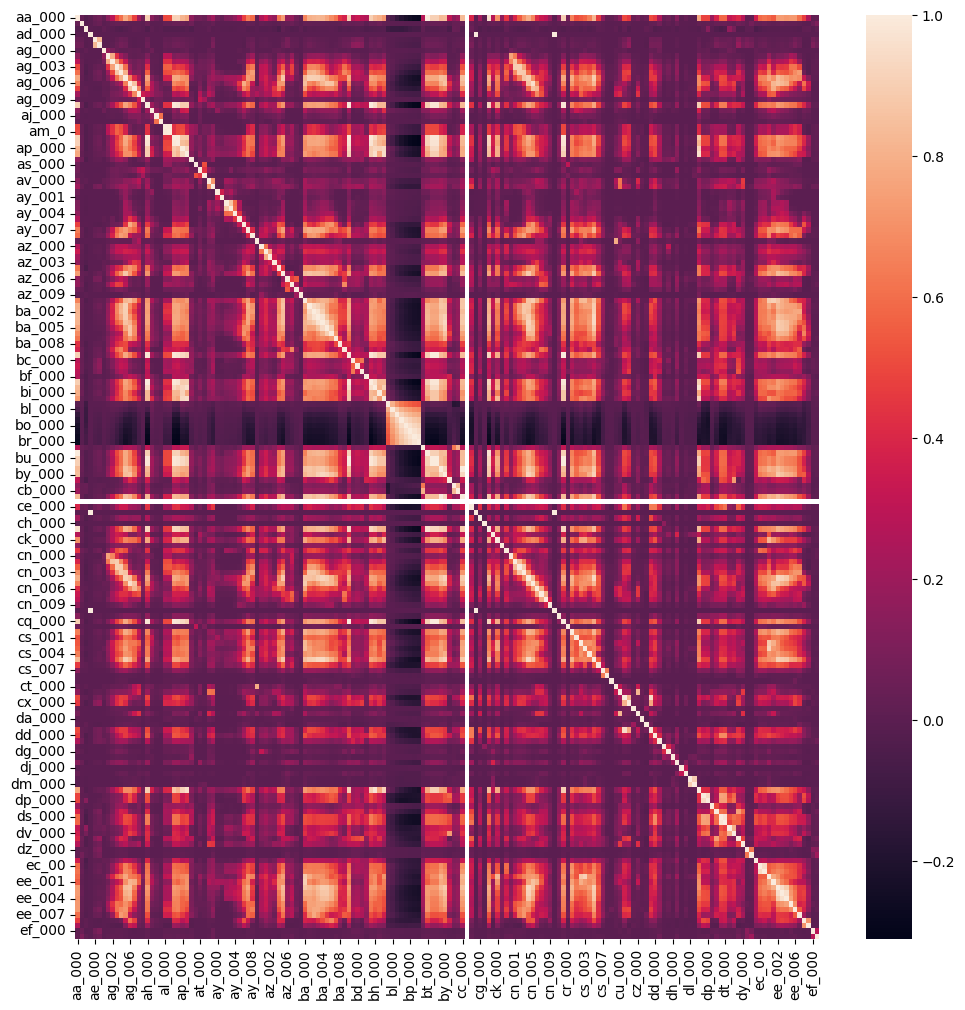

In [8]:
fit, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(df_train_X.corr())


## 1(b)iv.


In [9]:
df_train_X_cv.sort_values("CV", ascending=False)[0:math.ceil(math.sqrt(170))].index

Index(['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000',
       'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000', 'ay_001'],
      dtype='object')

In [10]:
cols = list(df_train_X_cv.sort_values("CV", ascending=False)[0:math.floor(math.sqrt(170))].index)
cols.append("class")

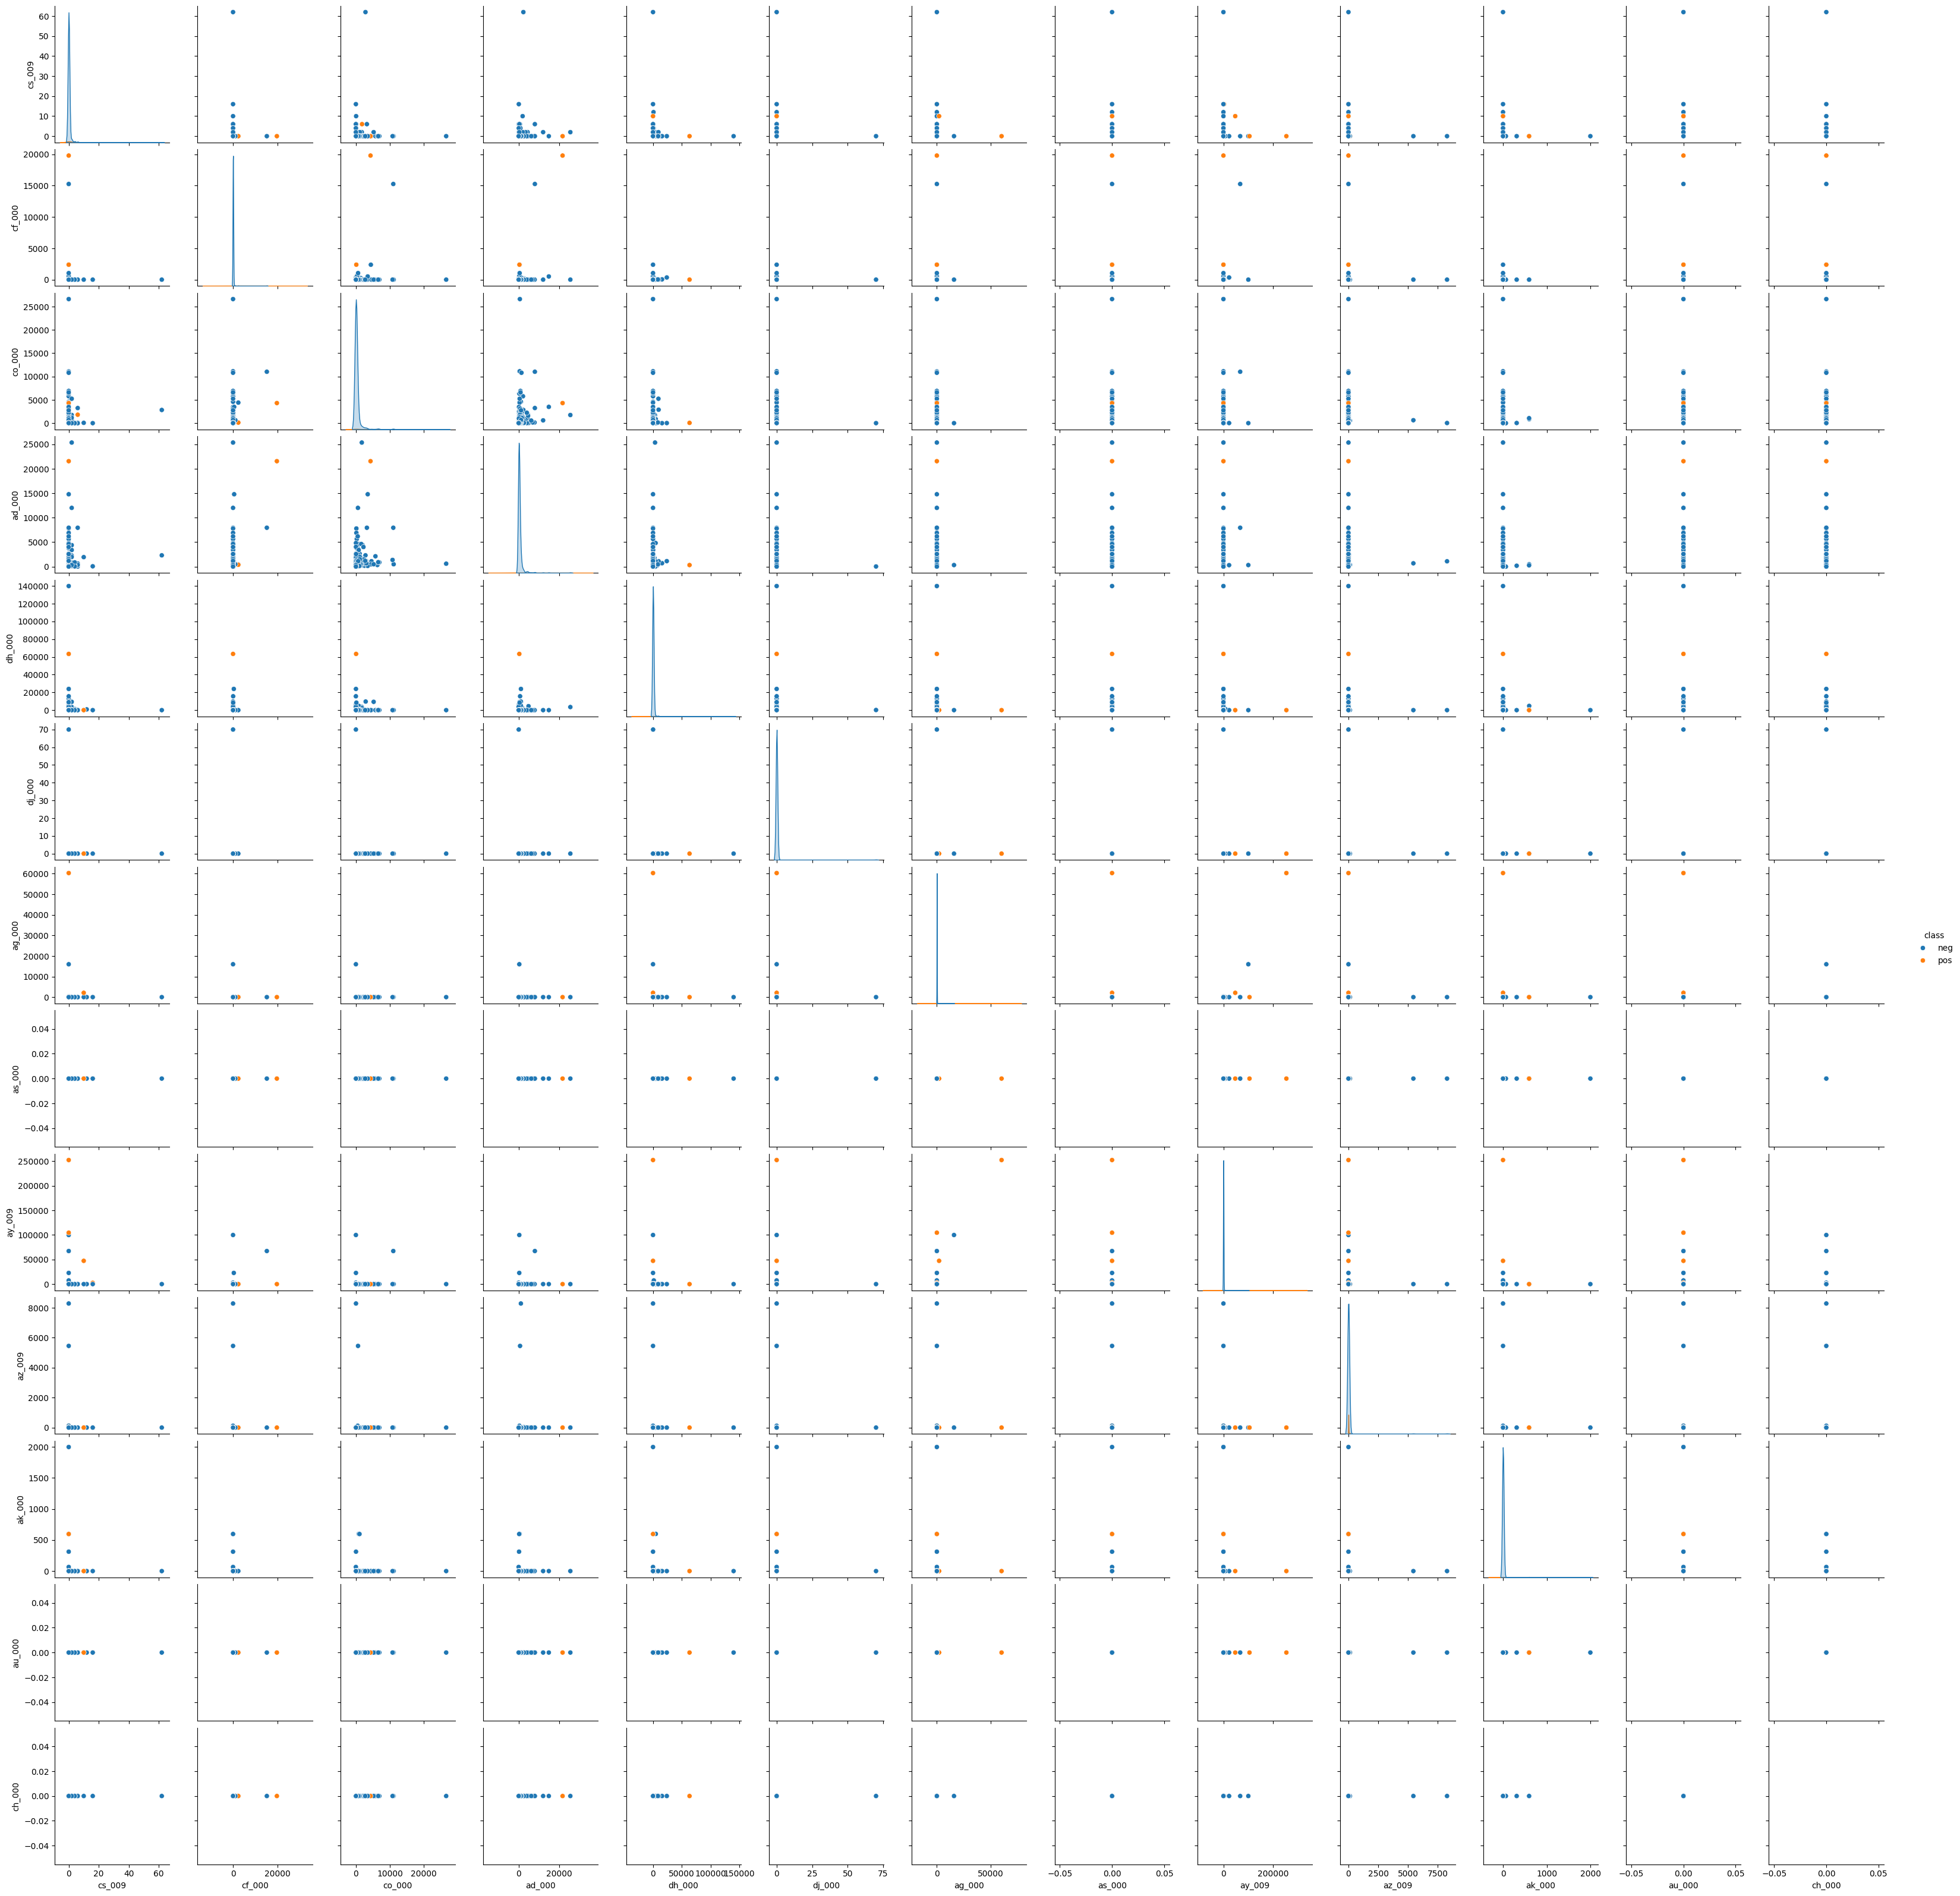

In [11]:
sns.pairplot(df_train[cols].sample(1000, random_state= 42), hue="class", )

In [12]:
cols.pop(cols.index('class'))
print(cols)

['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


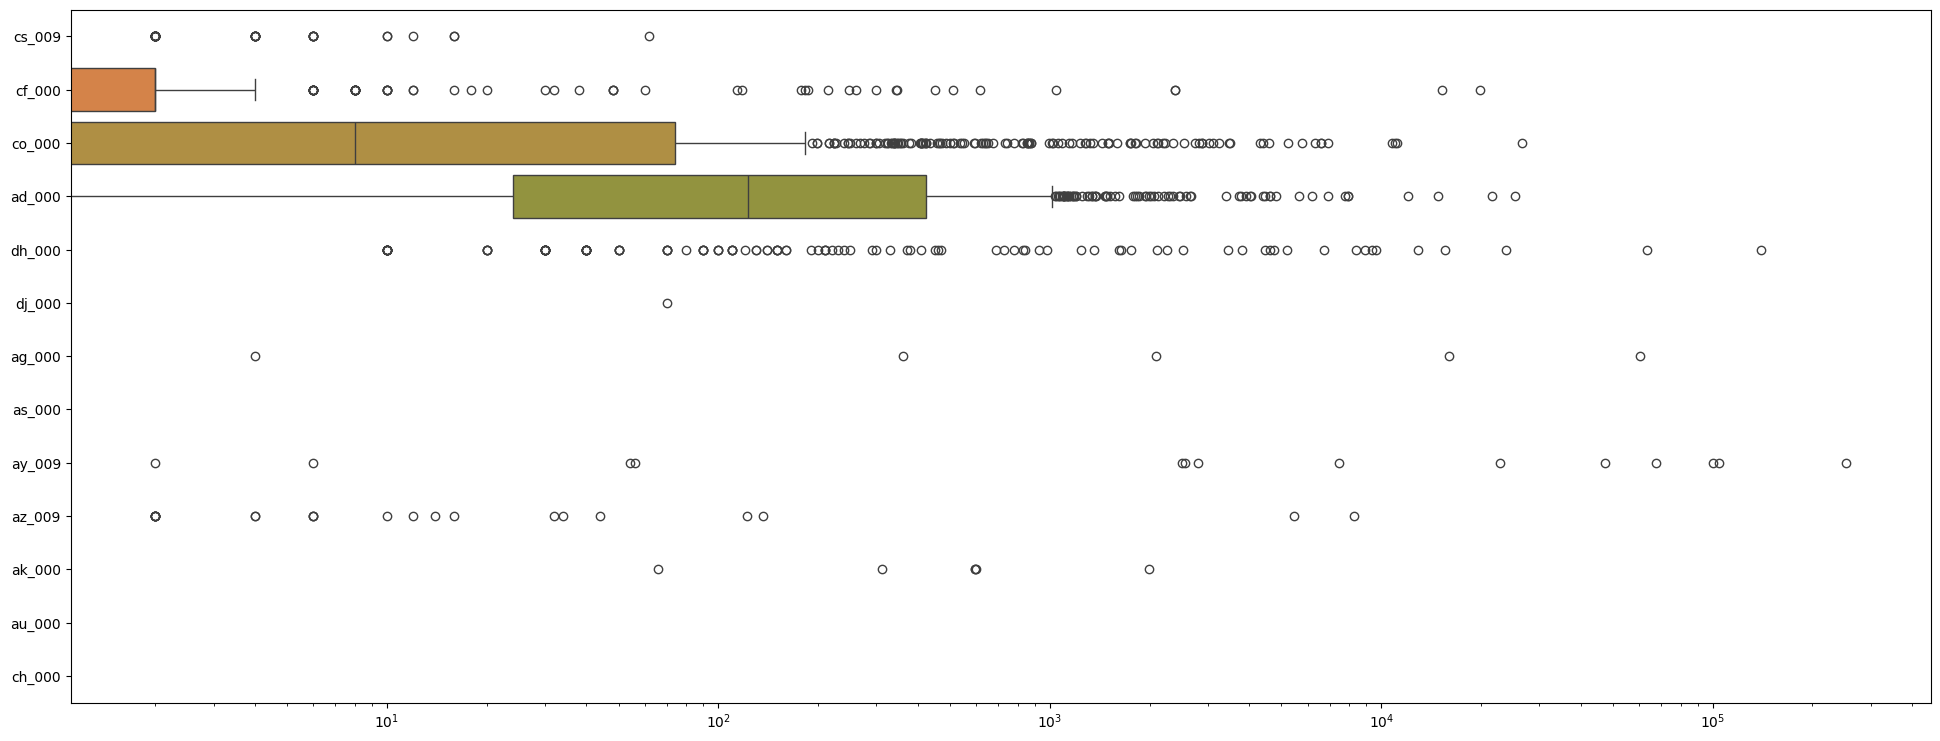

In [13]:
plt.figure(figsize=(24,9))
ax = sns.boxplot(df_train[cols].sample(1000, random_state= 42), orient='h')
ax.set_xscale('log')

No, I don't thinl we can draw the conclusion only through scatter plot.

## 1(b)v.


In [14]:
Counter(df_train['class'])


Counter({'neg': 59000, 'pos': 1000})

Yes, a serious data imbalance exists in this training set.

## 1(c)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [16]:
y_train = df_train_y.replace({'neg':-1, 'pos':1})
model = RandomForestClassifier(criterion='gini')
model.fit(df_train_X, y_train)
y_pred = model.predict(df_train_X)
y_prob = model.predict_proba(df_train_X)


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/498043795.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':-1, 'pos':1})


Training error: 0.0

Training confusion matrix: [[59000     0]
 [    0  1000]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


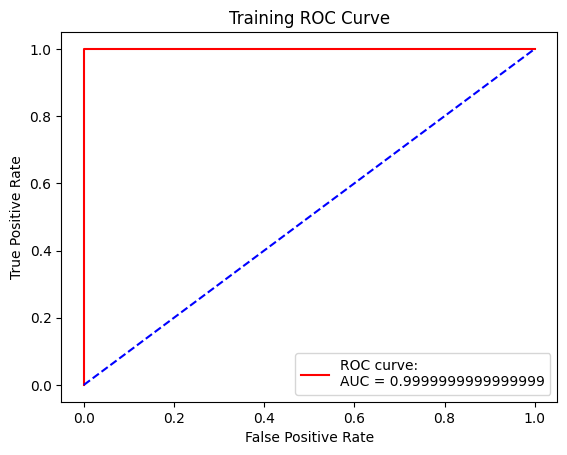

In [17]:
def plot_roc_curve(true_y, y_pred, y_prob, model, dataset = 'Training', oob = False):

    if oob == 'True':
        acc = model.oob_score_
        print(f'{dataset} error: {1 - acc}\n')

    else:
        acc = accuracy_score(true_y, y_pred)
        print(f'{dataset} error: {1 - acc}\n')
    print(f'{dataset} confusion matrix: {confusion_matrix(true_y, y_pred)}')
    print(y_prob)

    fpr, tpr, thresholds = roc_curve(true_y, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='red', label=f'ROC curve:\nAUC = {roc_auc}')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="best")
    plt.title(f'{dataset} ROC Curve')
    plt.show()

plot_roc_curve(y_train, y_pred, y_prob, model = model, dataset = 'Training', oob = False)


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/2194916091.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = df_test_y.replace({'neg':-1, 'pos':1})


Testing error: 0.00737500000000002

Testing confusion matrix: [[15604    21]
 [   97   278]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


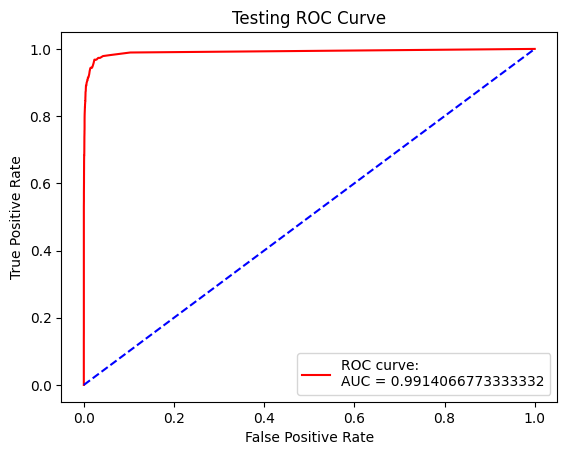

In [18]:
y_test = df_test_y.replace({'neg':-1, 'pos':1})
y_pred = model.predict(df_test_X)
y_prob = model.predict_proba(df_test_X)

plot_roc_curve(y_test, y_pred, y_prob, model = model, dataset = 'Testing', oob = False)


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/2233155261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':-1, 'pos':1})


Training error: 0.0

Training confusion matrix: [[59000     0]
 [    0  1000]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


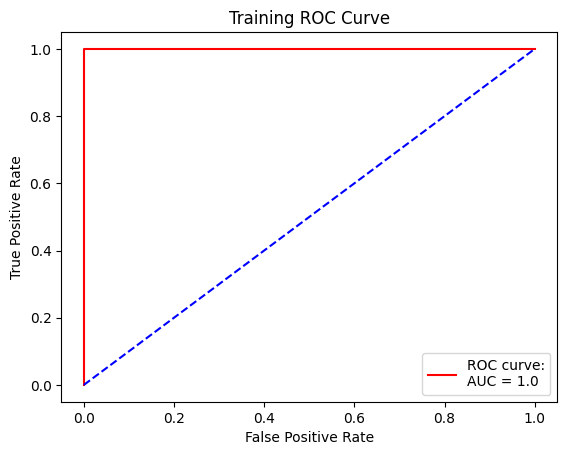

In [19]:
y_train = df_train_y.replace({'neg':-1, 'pos':1})
model_oob = RandomForestClassifier(criterion='gini', bootstrap=True, oob_score=True)
model_oob.fit(df_train_X, y_train)
y_pred = model_oob.predict(df_train_X)
y_prob = model_oob.predict_proba(df_train_X)

plot_roc_curve(y_train, y_pred, y_prob, model = model_oob, dataset = 'Training', oob = True)

/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/3470356716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = df_test_y.replace({'neg':-1, 'pos':1})


Testing error: 0.00737500000000002

Testing confusion matrix: [[15604    21]
 [   97   278]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


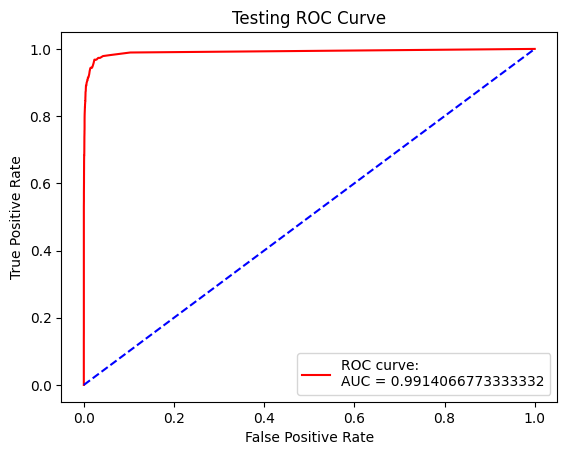

In [20]:
y_test = df_test_y.replace({'neg':-1, 'pos':1})
y_pred = model.predict(df_test_X)
y_prob = model.predict_proba(df_test_X)

plot_roc_curve(y_test, y_pred, y_prob, model = model_oob, dataset = 'Testing', oob = True)

## 1(d)


RandomForestClassifier with class_weight = 'balanced' or 'balanced_subsample':  

Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.  
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))  

The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.  

BalancedRandomForestClassifier:  
A balanced random forest differs from a classical random forest by the fact that it will draw a bootstrap sample from the minority class and sample with replacement the same number of samples from the majority class.

In [21]:
model_imbalanca_oob = BalancedRandomForestClassifier(criterion='gini', bootstrap=True, oob_score=True)
# model_imbalanca_oob = RandomForestClassifier(criterion='gini', random_state = 10, class_weight = 'balanced', bootstrap=True, oob_score = True)


In [22]:
y_train = df_train_y.replace({'neg':-1, 'pos':1})
model_imbalanca_oob = RandomForestClassifier(criterion='gini', random_state=10, bootstrap=True, oob_score=True)
model_imbalanca_oob.fit(df_train_X, y_train)
y_pred = model_imbalanca_oob.predict(df_train_X)
y_prob = model_imbalanca_oob.predict_proba(df_train_X)

/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/70248683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':-1, 'pos':1})


Training error: 0.0

Training confusion matrix: [[59000     0]
 [    0  1000]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


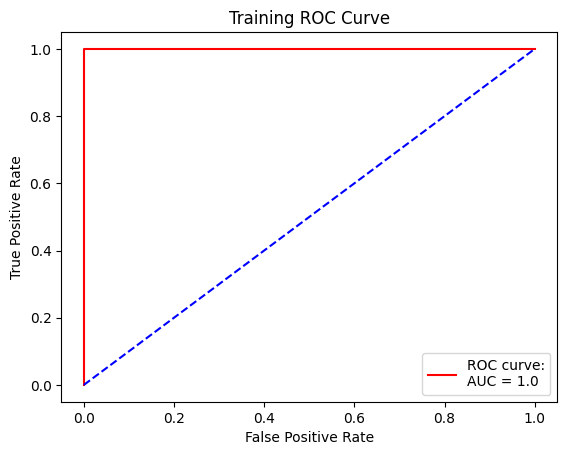

In [23]:
plot_roc_curve(y_train, y_pred, y_prob, model = model_imbalanca_oob, dataset = 'Training', oob = True)


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/337437496.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = df_test_y.replace({'neg':-1, 'pos':1})


Testing error: 0.007249999999999979

Testing confusion matrix: [[15609    16]
 [  100   275]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


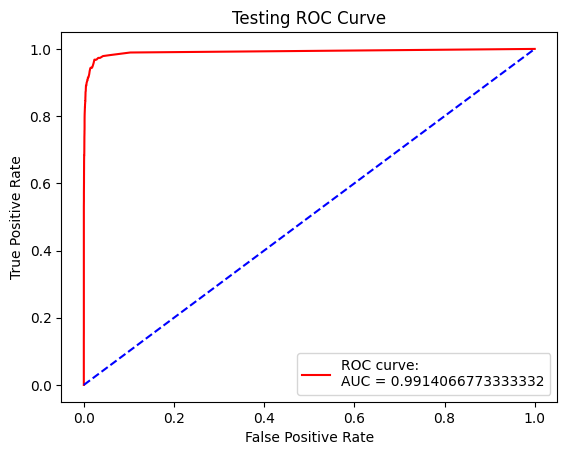

In [24]:
y_test = df_test_y.replace({'neg':-1, 'pos':1})
y_pred = model_imbalanca_oob.predict(df_test_X)
y_prob = model.predict_proba(df_test_X)

plot_roc_curve(y_test, y_pred, y_prob, model = model_imbalanca_oob, dataset = 'Testing', oob = True)

It seems that there is almost no difference between 1(c) and 1(d) in AUC.  
However, if we look at confusion matrix, we can see that there is a slight difference.
1(d) model with compensation for class imbalance perfroms a little bit better than 1(c).

## 1(e)


In [25]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold



In [26]:
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

}
model = XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.6, learning_rate = 0.1)
gridcv = GridSearchCV(model, param_grid, cv = KFold(n_splits = 5, shuffle = True), scoring = "accuracy")

y_train = df_train_y.replace({'neg':0, 'pos':1})

gridcv.fit(df_train_X, y_train)
best_alpha = gridcv.best_params_['alpha']

/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/3965468815.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':0, 'pos':1})


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/3583771642.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':0, 'pos':1})
/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/3583771642.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = df_test_y.replace({'neg':0, 'pos':1})


Training error: 0.0005833333333333801

Training confusion matrix: [[59000     0]
 [   35   965]]
[[9.9925381e-01 7.4619893e-04]
 [9.9947834e-01 5.2168523e-04]
 [9.9995607e-01 4.3933174e-05]
 ...
 [9.9986798e-01 1.3202637e-04]
 [9.9969888e-01 3.0113067e-04]
 [9.9995255e-01 4.7435064e-05]]


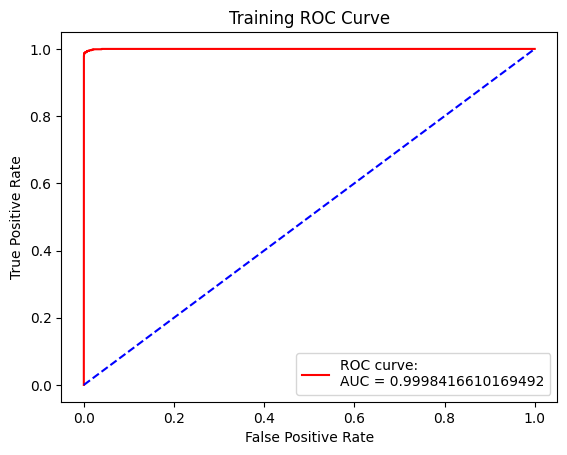

Testing error: 0.007187500000000013

Testing confusion matrix: [[15597    28]
 [   87   288]]
[[9.9984139e-01 1.5860127e-04]
 [9.9996644e-01 3.3580520e-05]
 [9.9850869e-01 1.4912864e-03]
 ...
 [9.9989653e-01 1.0348479e-04]
 [9.9888867e-01 1.1113208e-03]
 [9.9993002e-01 6.9969850e-05]]


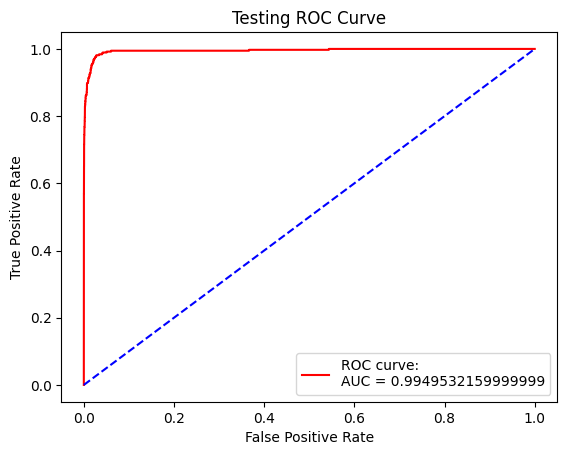

In [27]:
y_train = df_train_y.replace({'neg':0, 'pos':1})
y_test = df_test_y.replace({'neg':0, 'pos':1})

model = XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha, colsample_bytree = 0.6, 
                        learning_rate = 0.1)
model.fit(df_train_X, y_train)

y_train_pred = model.predict(df_train_X)
y_train_prob = model.predict_proba(df_train_X)
plot_roc_curve(y_train, y_train_pred, y_train_prob, model = model, dataset = 'Training', oob = False)

y_test_pred = model.predict(df_test_X)
y_test_prob = model.predict_proba(df_test_X)
plot_roc_curve(y_test, y_test_pred, y_test_prob, model = model, dataset = 'Testing', oob = False)

## 1(f)


In [28]:
from imblearn.over_sampling import SMOTE


In [29]:
y_train = df_train_y.replace({'neg':0, 'pos':1})
y_test = df_test_y.replace({'neg':0, 'pos':1})

smote = SMOTE()
df_smote_train_X, df_smote_train_y = smote.fit_resample(df_train_X, y_train)
print(f"With SMOTE: {Counter(y_train)}")
print(f"Without SMOTE: {Counter(df_smote_train_y)}")


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/2022596857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':0, 'pos':1})
/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/2022596857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = df_test_y.replace({'neg':0, 'pos':1})


With SMOTE: Counter({0: 59000, 1: 1000})
Without SMOTE: Counter({0: 59000, 1: 59000})


In [30]:
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

}
model = XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.6, learning_rate = 0.1)
gridcv = GridSearchCV(model, param_grid, cv = KFold(n_splits = 5, shuffle = True), scoring = "accuracy")

gridcv.fit(df_smote_train_X, df_smote_train_y)
best_alpha = gridcv.best_params_['alpha']
print(best_alpha)


0.001


/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/4037273179.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = df_train_y.replace({'neg':0, 'pos':1})
/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/4037273179.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = df_test_y.replace({'neg':0, 'pos':1})


Training with SMOTE error: 0.0014406779661017

Training with SMOTE confusion matrix: [[58869   131]
 [   39 58961]]
[[9.9820948e-01 1.7904958e-03]
 [9.9852628e-01 1.4736967e-03]
 [9.9977261e-01 2.2740626e-04]
 ...
 [1.2976050e-02 9.8702395e-01]
 [6.9392979e-02 9.3060702e-01]
 [5.9871078e-03 9.9401289e-01]]


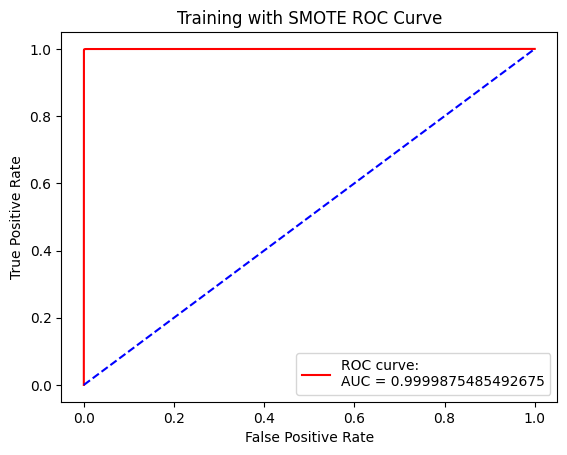

Testing with SMOTE error: 0.020000000000000018

Testing with SMOTE confusion matrix: [[15348   277]
 [   43   332]]
[[9.9902564e-01 9.7435294e-04]
 [9.9938613e-01 6.1388017e-04]
 [9.9486393e-01 5.1360773e-03]
 ...
 [9.9953580e-01 4.6419288e-04]
 [9.9722731e-01 2.7727082e-03]
 [9.9962205e-01 3.7795684e-04]]


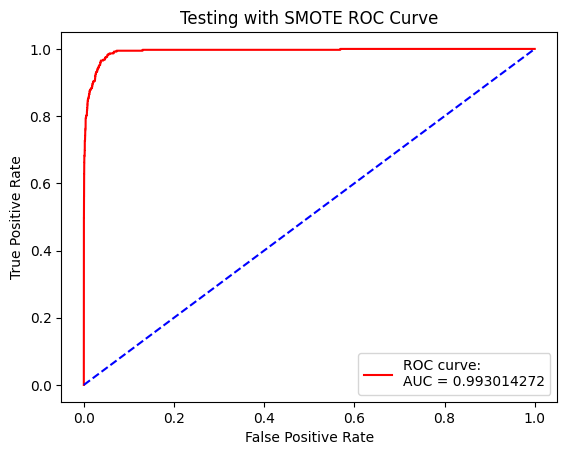

In [31]:
y_train = df_train_y.replace({'neg':0, 'pos':1})
y_test = df_test_y.replace({'neg':0, 'pos':1})

model = XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha, colsample_bytree = 0.6, 
                        learning_rate = 0.1)
model.fit(df_smote_train_X, df_smote_train_y)

y_train_pred = model.predict(df_smote_train_X)
y_train_prob = model.predict_proba(df_smote_train_X)
plot_roc_curve(df_smote_train_y, y_train_pred, y_train_prob, model = model, dataset = 'Training with SMOTE', oob = False)

y_test_pred = model.predict(df_test_X)
y_test_prob = model.predict_proba(df_test_X)
plot_roc_curve(y_test, y_test_pred, y_test_prob, model = model, dataset = 'Testing with SMOTE', oob = False)

# ISLR 6.6.3

## (a)  
As we increase s from 0, the training RSS will <B>Steadily decrease</B>. Since s = 0 equals to λ = ∞, all variables will be erased as 0.  
The model basically learn nothing from data. So when we gradually increase s, the model will start to learn from data, the training RSS will Steadily decrease.  
## (b)  
The test RSS will <B>Decrease initially, and then eventually start increasing in a U shape.</B>  
Since the model basically learn nothing from data at first. When s passes a certain threshold the model will overfit, learning too much information on training data so the test RSS will spike.  
## (c)  
The variance will <B>Steadily Increase.</B>  
s = 0 means that the model doesn't learn anything from data, which also means the variance is 0, it just a constant at first.
As we increase s, the model start learn information from data, the variance will start increasing, and eventually reaches ∞.
## (d)  
The bias will <B>Steadily decrease.</B> Since the variance will steadily increase, according to bias-variance tradeoff, the bias will decrease. Because the model will learn more and more information from data, it can caputre more complex pattern of data, and eventually be overfitting.  
## (e)  
The irreducible error will <b>Remain constant.</b> Since it is the act of god, the imperfection of the features, no model can never eliminate it.

# ISLR 6.6.5

<img src="../pic/IMG_1214.jpg">
<img src="../pic/IMG_1215.jpg">
<img src="../pic/IMG_1216.jpg">
<img src="../pic/IMG_1217.jpg">
<img src="../pic/IMG_1218.jpg">

# ISLR 8.4.5

Using Majority Polling, if the number of samples with a predicted probability >= 0.5 exceeds those with probability < 0.5, the overall classification is considered True. In this case, out of 10 samples, 6 have probabilities >= 0.5 and 4 have probabilities < 0.5. Since the positive class is in the majority, the classification will be red.

With the Average Probability method, the mean of all predicted probabilities is calculated. Here, the average probability is 0.45. Since this is less than 0.5, the overall classification will be green.

# ISLR 9.7.3

In [32]:
from sklearn.svm import SVC
import numpy as np


In [33]:
data = pd.DataFrame({'X1': [3, 2, 4, 1, 2, 4, 4], 
                   'X2':[4, 2, 4, 4, 1, 3, 1], 
                   'Y':['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})

data['Y'].replace({'blue': 0, 'red': 1}, inplace = True)
x_train, y_train = data.drop(['Y'], axis = 1), data['Y']
model = SVC(kernel='linear', C = 1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/3053360330.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Y'].replace({'blue': 0, 'red': 1}, inplace = True)
/var/folders/vy/qg2xs8zs2wvcchmgz5ttrvg40000gn/T/ipykernel_31039/3053360330.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

## (a)


<Axes: xlabel='X1', ylabel='X2'>

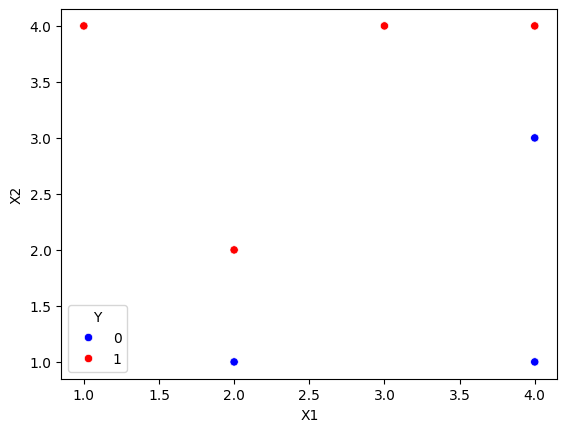

In [34]:
sns.scatterplot(data = data, x = "X1", y = "X2", hue = "Y", palette = ['blue', 'red'])

/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


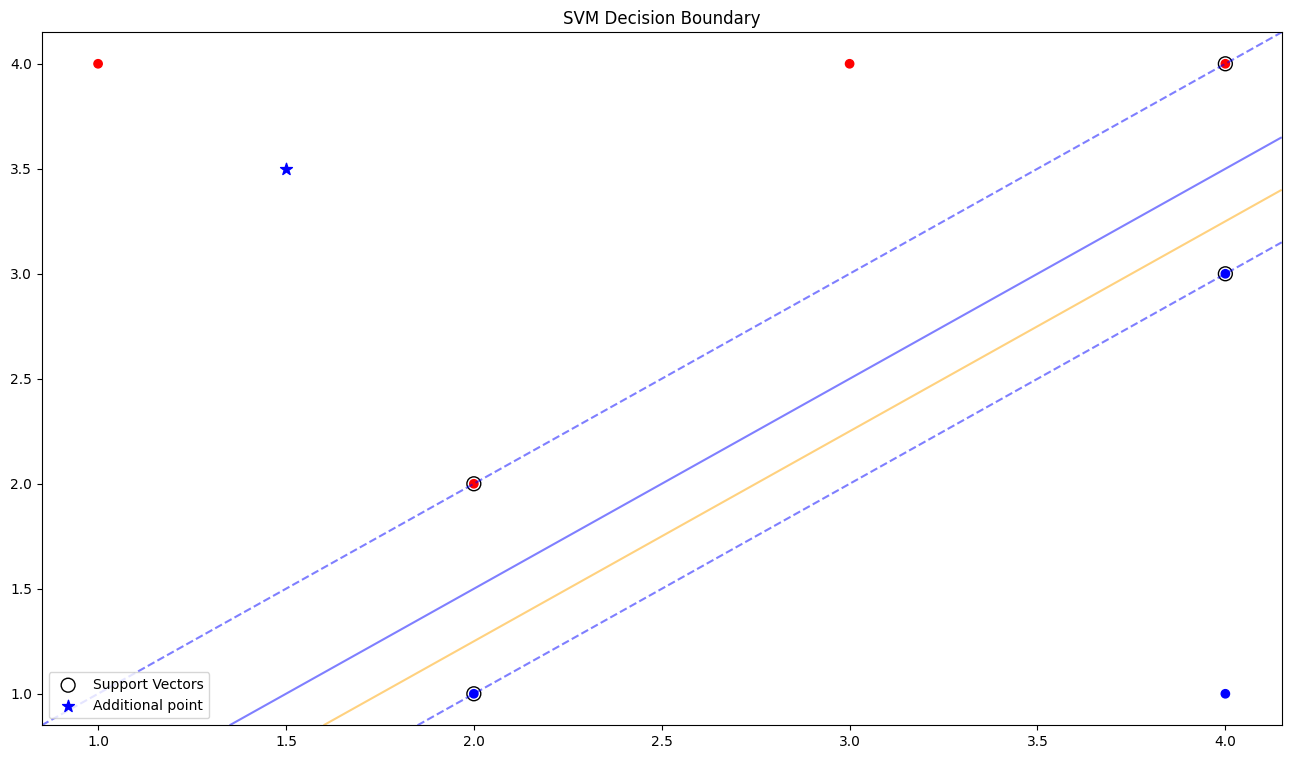

Intercept: [0.99970703]
Coefficients: [[-1.99941406  1.99941406]]


In [35]:
plt.figure(figsize=(16, 9))
colors = ['red' if label == 1 else 'blue' for label in data['Y']]

plt.scatter(data['X1'], data['X2'], c=colors)

xlim = plt.xlim()
ylim = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = model.decision_function(xy).reshape(xx.shape)

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='black', label="Support Vectors")

plt.scatter([1.5], [3.5], color='blue', marker='*', s=80, label="Additional point")
plt.contour(xx, yy, Z + 0.5, colors='orange', levels=[0], alpha=0.5, linestyles='-')
plt.contour(xx, yy, Z, colors='blue', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.legend(loc='best')
plt.title("SVM Decision Boundary")
plt.show()

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

## (b)  
The blue solid line is hyperplane  
## (c)  
beta 0 = 1, beta 1 = -2, beta 2 = 2.
If 1 + X1 * -2 + X2 * 2 >= 0, it will be classified to red, else blue.
## (d)  
dashed line are maximal margin.  
## (e)
support are the points lay on maximal margin area.
## (f)
a slight movement of the seventh observation would not affect the maximal margin hyperplane, since it is too far away from the maximal margins.
## (g)
the yellow solid line is not the optimal separating hyperplane, 1.5 + X1 * -2 + X2 * 2 >= 0
## (h)
the blue star will let two classes are no longer separable by a hyperplane.